<a href="https://colab.research.google.com/github/Rudrajit12/SupervisedML_Regression_Capstone_Project/blob/main/Yes_Bank_Stock_Closing_Price_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:**

### Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. 

### This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month.

### **The main objective is to predict the stock’s closing price of the month.**

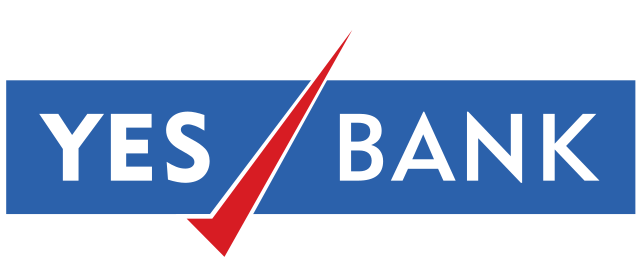

#### Yes Bank is an Indian bank headquartered in Mumbai, India and was founded by Rana Kapoor and Ashok Kapur in 2004.

#### It offers wide range of differentiated products for corporate and retail customers through retail banking and asset management services. On 5 March 2020, in an attempt to avoid the collapse of the bank, which had an excessive amount of bad loans, the Reserve Bank of India (RBI) took control of it. RBI later reconstructed the board and named Prashant Kumar, former chief financial officer and deputy managing director of State Bank of India, as MD & CEO of Yes Bank, along with Sunil Mehta, former non-executive chairman of Punjab National Bank, as Yes Bank’s non-executive chairman.

#### The bank’s management under the new leadership of Kumar, immediately repositioned itself and dealt with all internal and market related challenges to restore customer and depositor confidence. Under the coordinated efforts of the new board and management, Mehta assured shareholders of speedy recovery, even as the Reserve Bank of India (RBI), State Bank of India (SBI), HDFC Bank, ICICI Bank, Axis Bank and other banks lent it support through a historic Yes Bank Reconstruction Scheme 2020.

#### In July 2020, Yes Bank Ltd closed their follow-on public offer (FPO) with 95% subscription, driven by institutional investors.

#### As of 28 July 2020, Yes Bank is an associate of State Bank of India which has a 30% stake in the company.

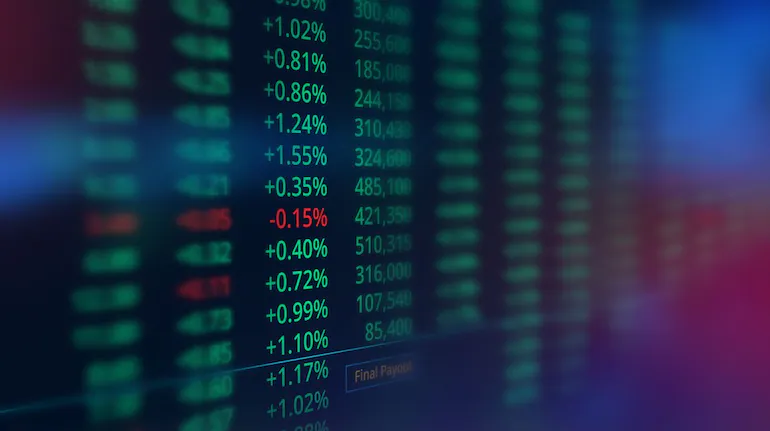

### **What is a Stock Market?**

#### A stock market, equity market, or share market is the aggregation of buyers and sellers of stocks (also called shares), which represent ownership claims on businesses; these may include securities listed on a public stock exchange, as well as stock that is only traded privately, such as shares of private companies which are sold to investors through equity crowdfunding platforms. Investment is usually made with an investment strategy in mind.

#### Stocks can be categorized by the country where the company is domiciled. For example, Nestlé and Novartis are domiciled in Switzerland and traded on the SIX Swiss Exchange, so they may be considered as part of the Swiss stock market, although the stocks may also be traded on exchanges in other countries, for example, as American depositary receipts (ADRs) on U.S. stock markets.

### **What is a Stock?**

#### A stock is a security that represents an ownership share in a company. When you purchase a company's stock, you're purchasing a small piece of that company, called a share.

#### Investors purchase stocks in companies they think will go up in value. If that happens, the company's stock increases in value as well. The stock can then be sold for a profit.

#### For companies, issuing stock is a way to raise money to grow and invest in their business. For investors, stocks are a way to grow their money and outpace inflation over time.

#### When you own stock in a company, you are called a shareholder because you share in the company's profits.

## **1. Import the libraries and the dataset to understand the variables present**

In [63]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = [15,9]
sns.set(rc={'figure.figsize':(15,9)})

In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Loading the data
yes_df = pd.read_csv('/content/drive/MyDrive/Yes Bank Stock Closing Price Prediction - Rudrajit Bhattacharyya/data_YesBank_StockPrices.csv')
yes_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [4]:
# last 5 rows of the data
yes_df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [5]:
# number of records in the data
len(yes_df)

185

In [6]:
# shape of dataset
yes_df.shape

(185, 5)

In [7]:
# columns in the dataset
yes_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

* There are a total of 185 rows and 5 columns in the dataset.
* It contains the columns Date, Open, High, Low, Close.

In [8]:
# check data types of the features
yes_df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

## **Data Summary:**

* **Date**: Contains the month and year information and is of object datatype. We need to convert it into a datetime object before diving into EDA.

* **Open**: Contains information about the opening price on a particular month and year. Opening price is the price at which a security first trades upon the opening of an exchange on a trading day. For e.g, NSE markets open at 09:15 hrs IST. It is a float variable in our dataset.

* **High**: High is the highest price at which a stock traded during the course of the trading day. In our case it is the highest price in a month that the stock traded at. It is also a float variable in our dataset.

* **Low**: Low is the lowest price at which a stock traded during the course of the trading day. In our case it is the lowest price in a month that the stock traded at. This is also a float variable in our dataset.

* **Close**: Contains information about the closing price on a particular month and year. Closing price is the price at which a security last trades before the market officially closes for trading. For e.g, NSE markets close at 15:30 hrs IST. It is our dependent variable here and of float datatype.

## **2. Information/Description of the Dataset:**

In [9]:
# check null values in the dataset
yes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [10]:
# description of the dataset
yes_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


## **3. Check for duplicates and missing values in the dataset:**

#### When it comes to data, there are many different sorts of quality issues, which is why data cleaning is one of the most time-consuming aspects of data analysis.

#### Formatting issues (e.g., rows and columns merged), missing data, duplicated rows, spelling discrepancies, and so on could all be present. These difficulties could make data analysis difficult, resulting in inaccuracies or inappropriate results. As a result, these issues must be addressed before data can be analyzed. Data cleaning is frequently done in an unplanned, difficult-to-define manner.

#### **The date column needs to be converted into a datetime object and we will extract the date in the format YYYY-MM-DD.**

In [11]:
# convert date into datetime object
from datetime import datetime
yes_df['Date'] = yes_df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [12]:
# check the dataframe
yes_df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [13]:
# check for duplicates in the data
yes_df.duplicated().sum()

0

In [14]:
# check for null values
yes_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

#### There are no duplicate or null values present in the dataset. It is an almost cleaned dataset and we're ready to move to EDA.

## **Exploratory Data Analysis:**

### **What's the highest and lowest closing prices of the stock?**

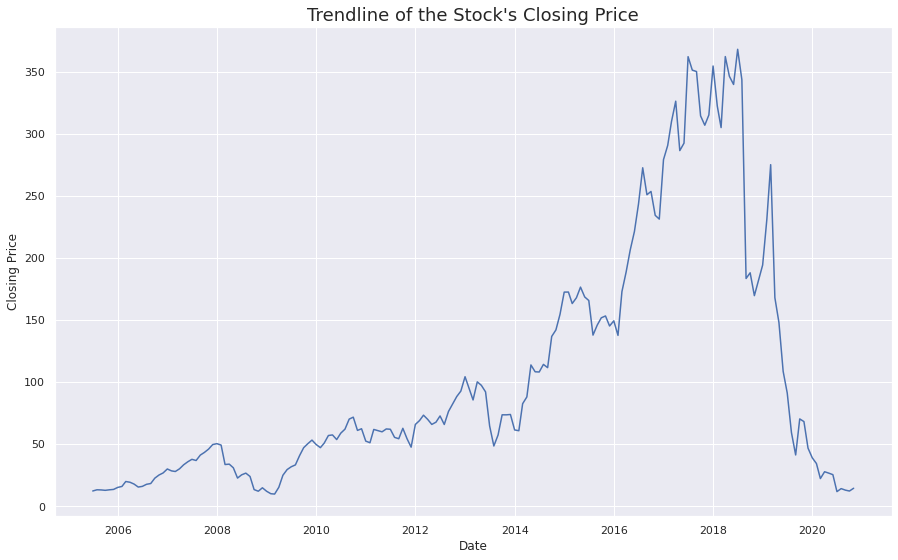

In [64]:
# trend line of stock's closing price
plt.plot(yes_df['Date'], yes_df['Close'])
plt.title("Trendline of the Stock's Closing Price", fontsize = 18)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

* The trendline shows a lot of fluctuations happening in the stock's closing price but it grew a lot from 2016 to 2018 to the investor's delight.

* After 2018, there is a drastic fall in the stock price and it is very natural due to the Rana Kapoor fraud case.

* We can infer that it was a good stock to buy in the initial years like 2006-2012 and sell it within the period of 2016-2018.

### **What's the highest and lowest opening prices of the stock?**

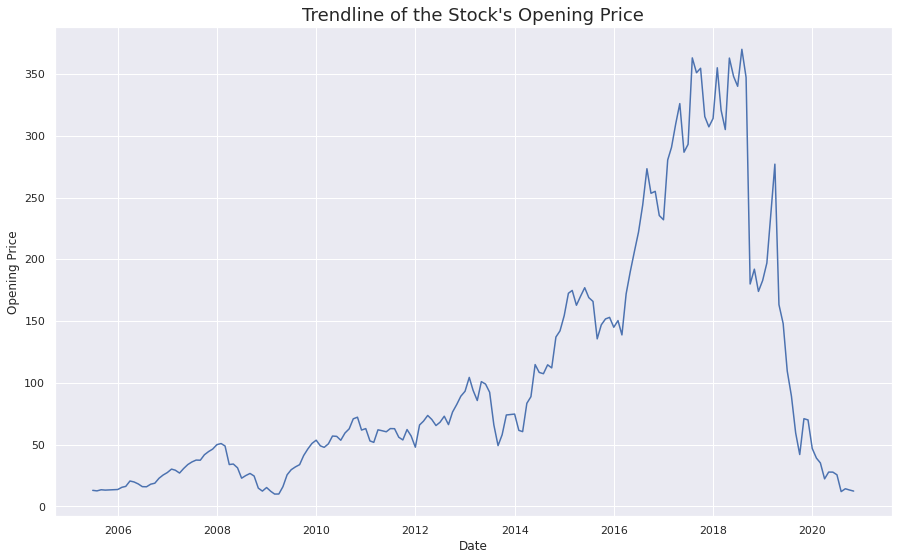

In [65]:
# trend line of stock's opening price
plt.plot(yes_df['Date'], yes_df['Open'])
plt.title("Trendline of the Stock's Opening Price", fontsize = 18)
plt.xlabel("Date")
plt.ylabel("Opening Price")
plt.show()

* The trendline for opening prices shows it is very similar to the stock's closing prices.

* Thus, it means that there wasn't a drastic growth/fall in the stock's closing price as compared to the stock's opening price on any given day. It wasn't a highly volatile stock before the Rana Kapoor Fraud Case in 2018.

### **What's the all time high of the stock and when did it happen?**

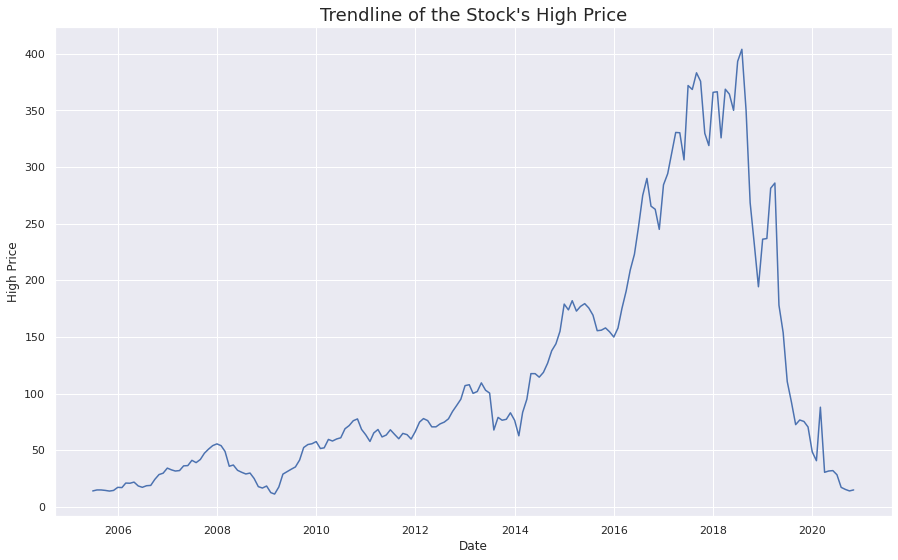

In [66]:
# trend line of stock's highest price
plt.plot(yes_df['Date'], yes_df['High'])
plt.title("Trendline of the Stock's High Price", fontsize = 18)
plt.xlabel("Date")
plt.ylabel("High Price")
plt.show()

* The stock hit an all time high around the period of Aug 2018 (Rs 404). After that it went on to fall drastically every month.

* The stock traded at a good high around the period from start of 2017 to end of 2018. Investors who sold their shares during these periods got the most profits out of the stock.

* All thanks to Rana Kapoor and Co, that the stock prices are back to the point where it began during the year 2005.

### **What's the all time low of the stock and when did that happen?**

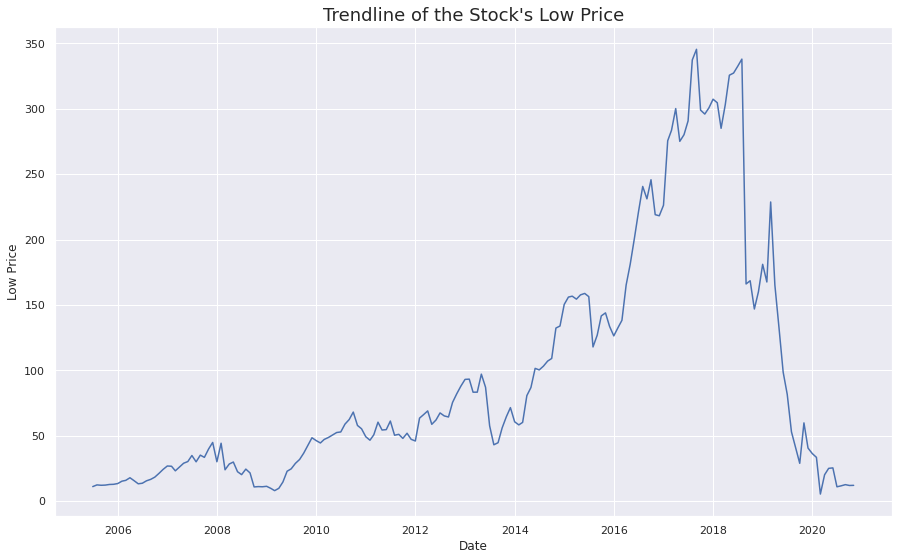

In [67]:
# trend line of stock's lowest price
plt.plot(yes_df['Date'], yes_df['Low'])
plt.title("Trendline of the Stock's Low Price", fontsize = 18)
plt.xlabel("Date")
plt.ylabel("Low Price")
plt.show()

* The stock hit an all time low around the period of Mar 2020 (Rs 5.55). It traded around Rs 10- Rs 30 after that.

* The best period to sell the stock was during 2017-2018 as it traded around the all time high mark in these two years.

### **Comparison of the stock's high and low prices:**

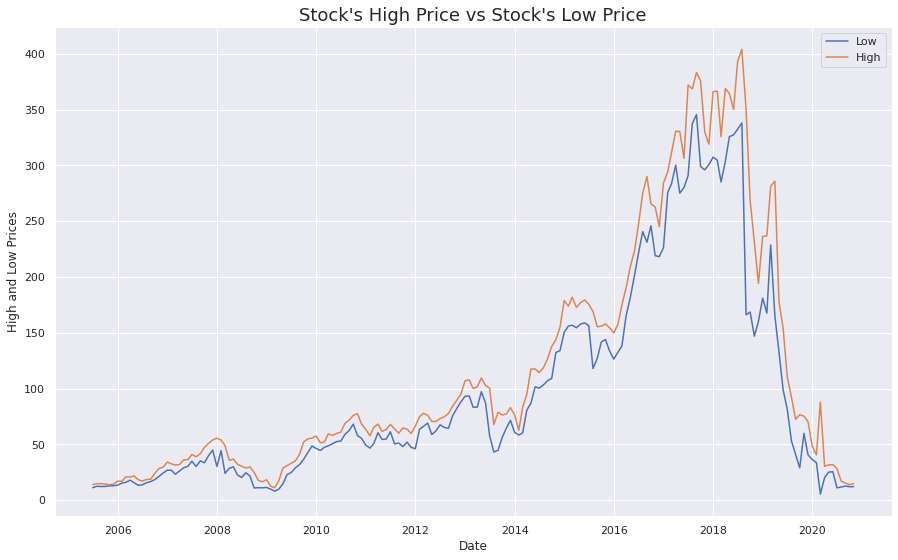

In [68]:
# what's the difference between the high and low prices of the stock
plt.plot(yes_df['Date'], yes_df['Low'], label='Low')
plt.plot(yes_df['Date'], yes_df['High'], label='High')
plt.title("Stock's High Price vs Stock's Low Price", fontsize = 18)
plt.xlabel("Date")
plt.ylabel("High and Low Prices")
plt.legend()
plt.show()

* The above plot depicts the scenario that the stock's high price doesn't have much difference with the stock's low price at any given point of time.

* The price band between the low and high price remained the same throughout our dataset.

### **Comparison of the stock's opening price and closing price:**

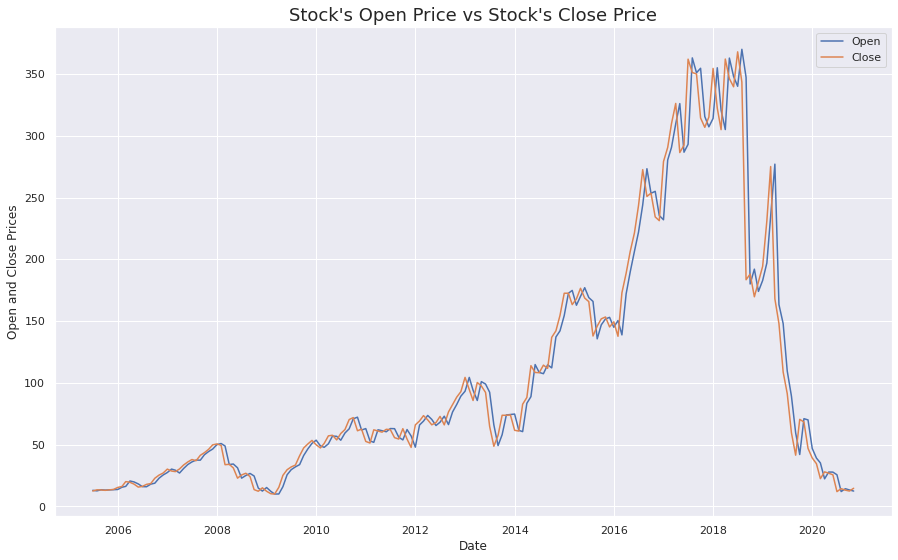

In [69]:
# what's the difference between the open and close prices of the stock
plt.plot(yes_df['Date'], yes_df['Open'], label='Open')
plt.plot(yes_df['Date'], yes_df['Close'], label='Close')
plt.title("Stock's Open Price vs Stock's Close Price", fontsize = 18)
plt.xlabel("Date")
plt.ylabel("Open and Close Prices")
plt.legend()
plt.show()

* There's hardly any difference between the stock's opening price and the closing price on any given day.

* The closing price is above the opening price during the period 2016 to 2018 and then after the Rana Kapoor Saga, the closing price mostly remained below the opening price on any given day.

### **Let us check the distribution of the target variable (closing price):**

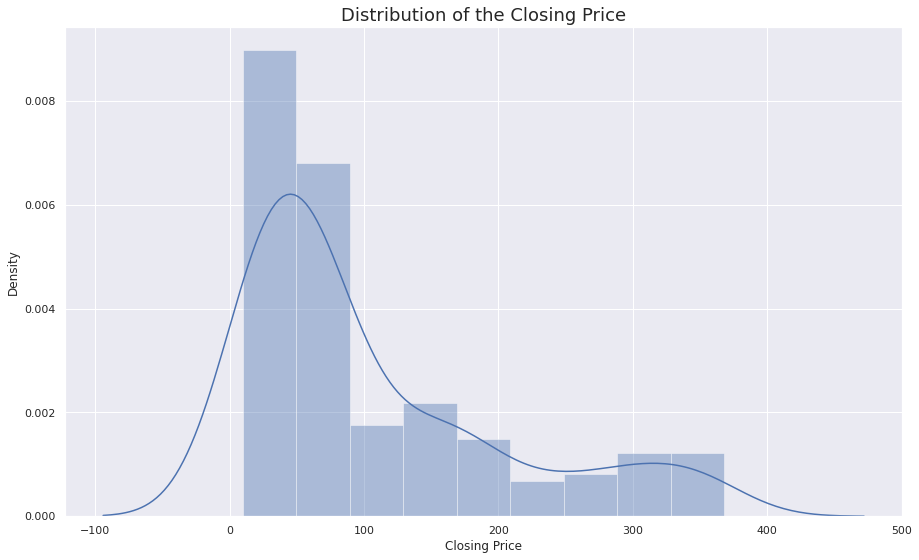

In [70]:
# plot the distribution of the close price
sns.distplot(yes_df['Close'])
plt.title("Distribution of the Closing Price", fontsize = 18)
plt.xlabel("Closing Price")
plt.ylabel("Density")
plt.show()

* We can see from the distribution that it is a right skewed distribution and most of the closing prices lie between the range of 0 to 100.

* We will apply log transformation to the target variable to make the distribution normal.

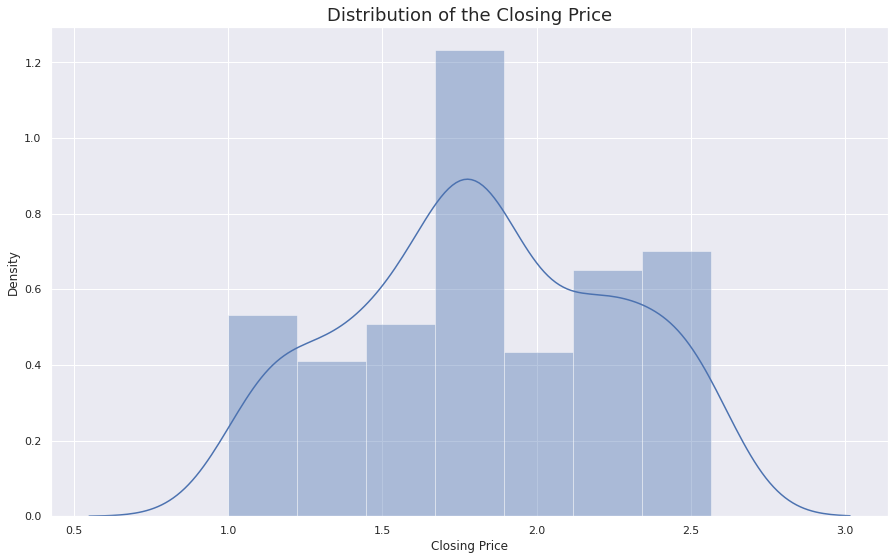

In [71]:
# applying log transformation
sns.distplot(np.log10(yes_df['Close']))
plt.title("Distribution of the Closing Price", fontsize = 18)
plt.xlabel("Closing Price")
plt.ylabel("Density")
plt.show()

* This plot looks more like a normal distribution.

### **Check the outliers in the target variable:**

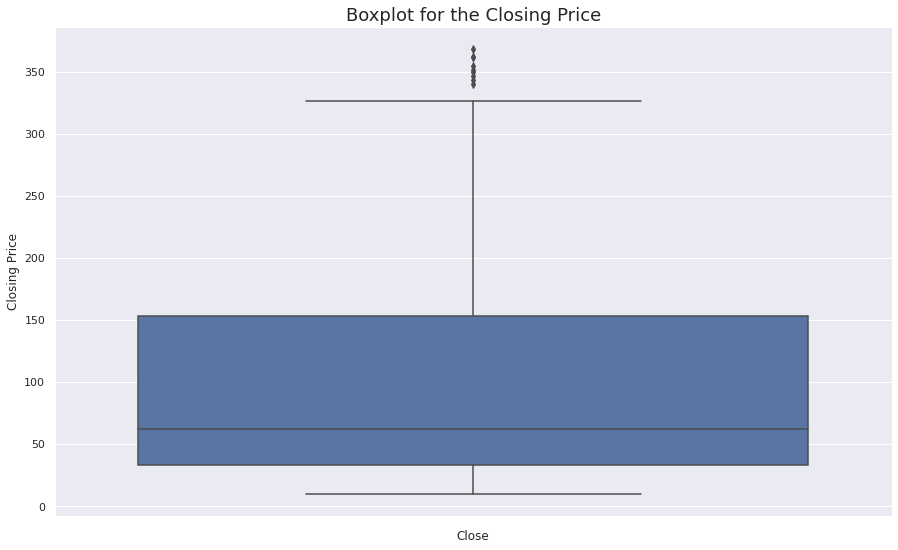

In [72]:
# plot the boxplot for closing price
sns.boxplot(y = yes_df['Close'])
plt.title("Boxplot for the Closing Price", fontsize = 18)
plt.xlabel("Close")
plt.ylabel("Closing Price")
plt.show()

* Though this plot shows that there are few outliers present in the 'Close' variable but we know that the stock reached around that price in real life as per the information we can get from stock trading platforms.

* The price reached an all time high of Rs 404 around August 2018 and stayed around for sometime.

* Thus, we cannot treat any value as outlier and remove them.

### **Let us check the distribution of the independent variables:**

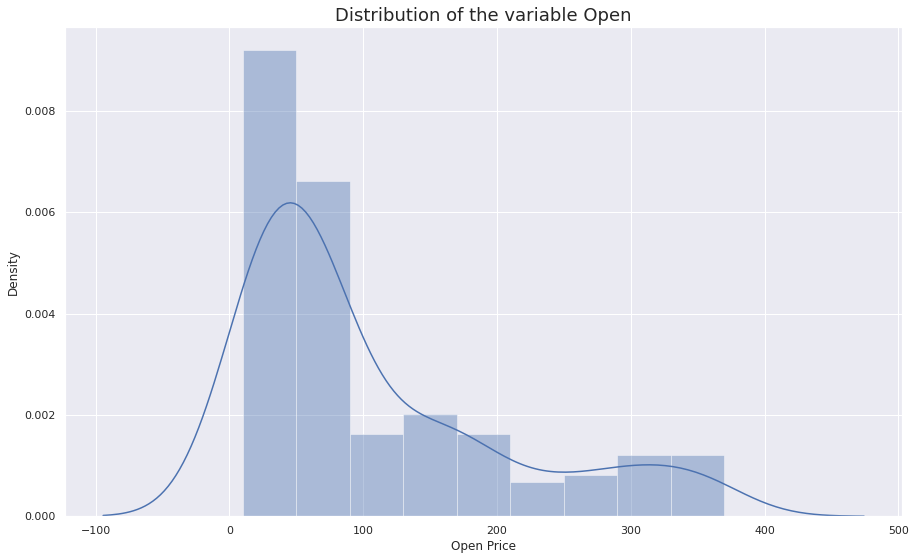

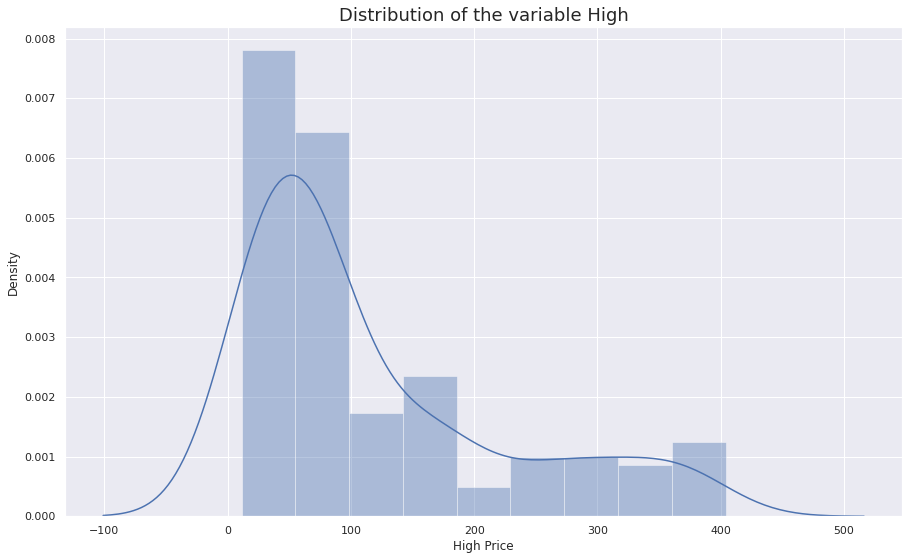

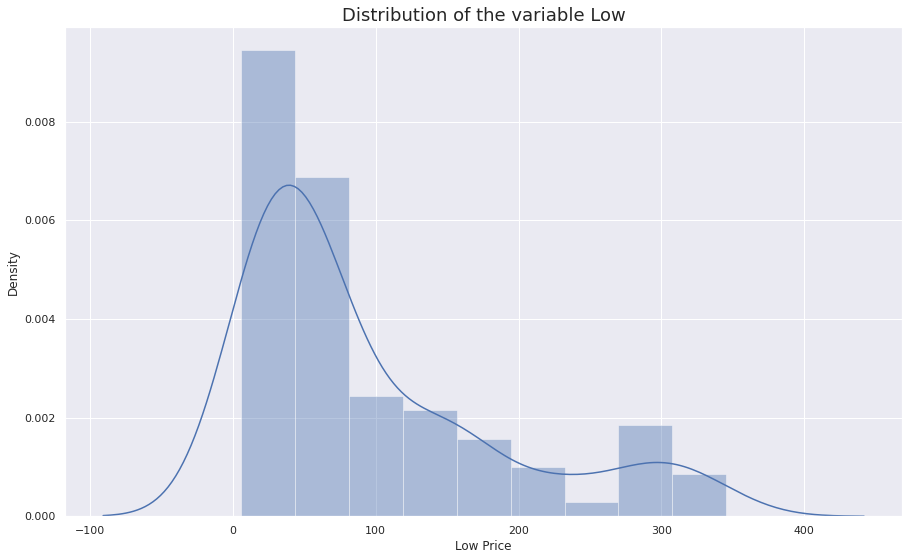

In [73]:
# plot the distribution of the independent variables
for feature in ['Open','High','Low']:
  plt.figure()
  sns.distplot(yes_df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize = 18)
  plt.xlabel(f"{feature} Price")
  plt.ylabel("Density")

* All the independent variable looks to have a right skewed distribution. We will need to apply log transformation to convert these into normal distributions.

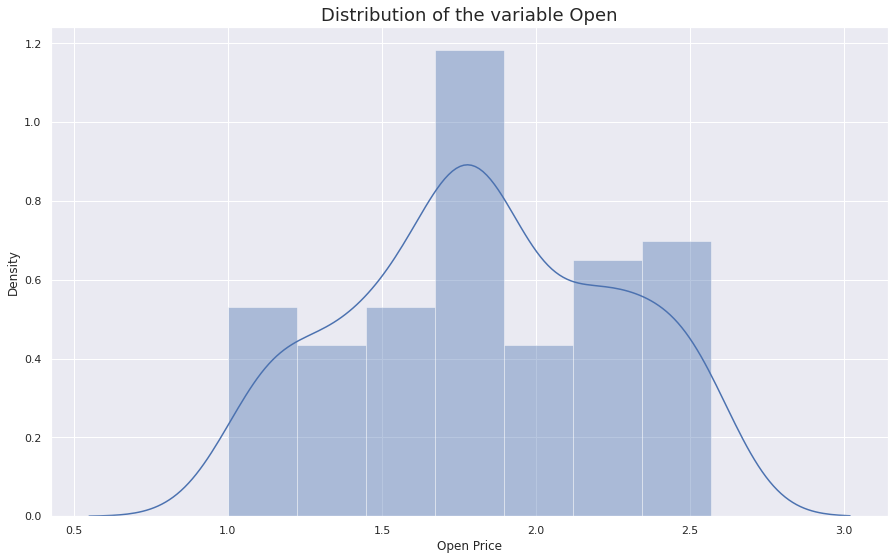

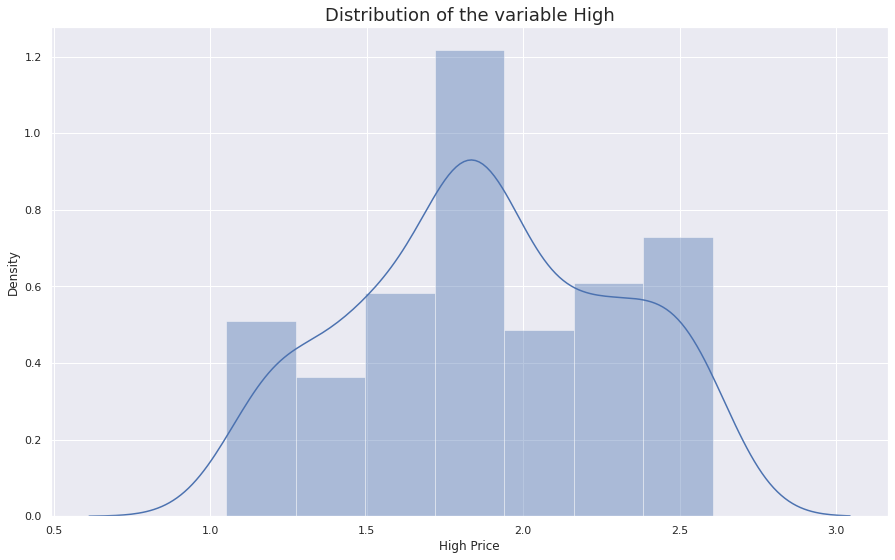

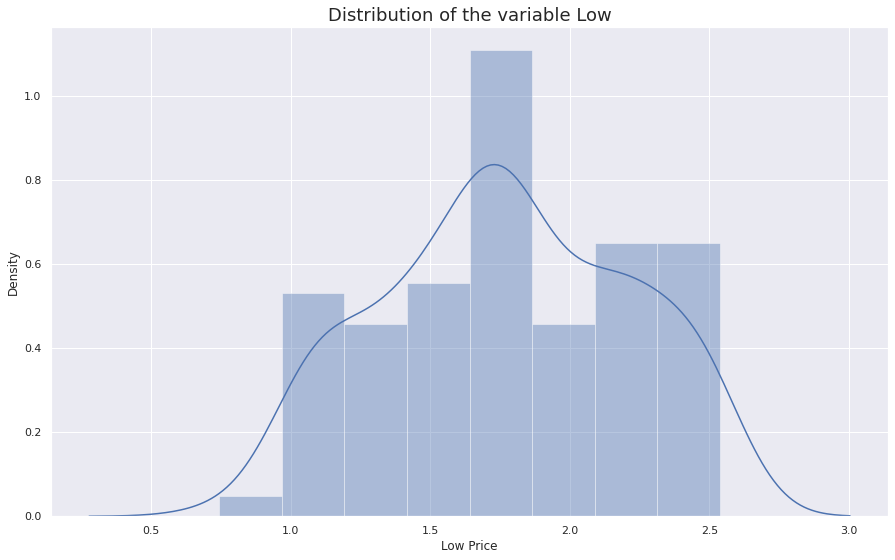

In [74]:
# applying log transformation on the independent variables
for feature in ['Open','High','Low']:
  plt.figure()
  sns.distplot(np.log10(yes_df[feature]))
  plt.title(f"Distribution of the variable {feature}", fontsize = 18)
  plt.xlabel(f"{feature} Price")
  plt.ylabel("Density")

* All of the independent variable distributions looks like a normal distribution now.

### **Let us check the outliers of the independent variables:**

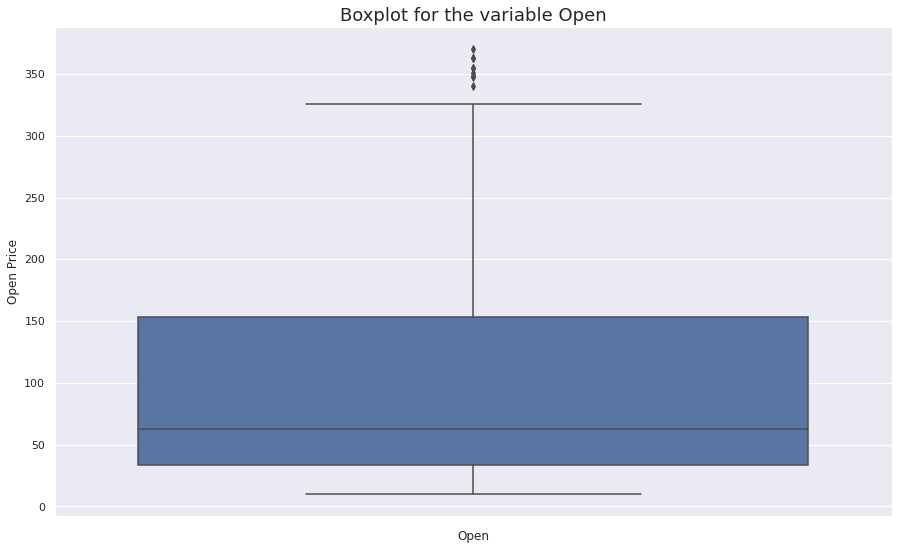

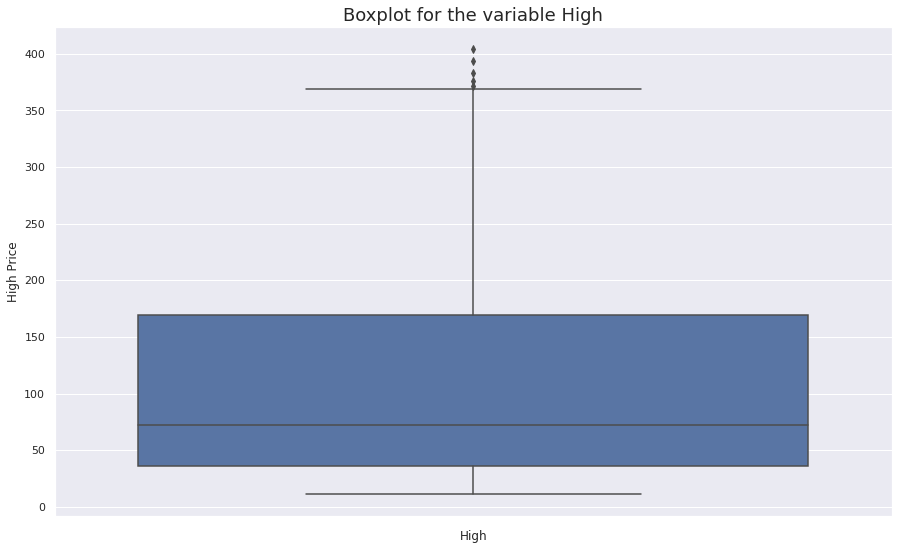

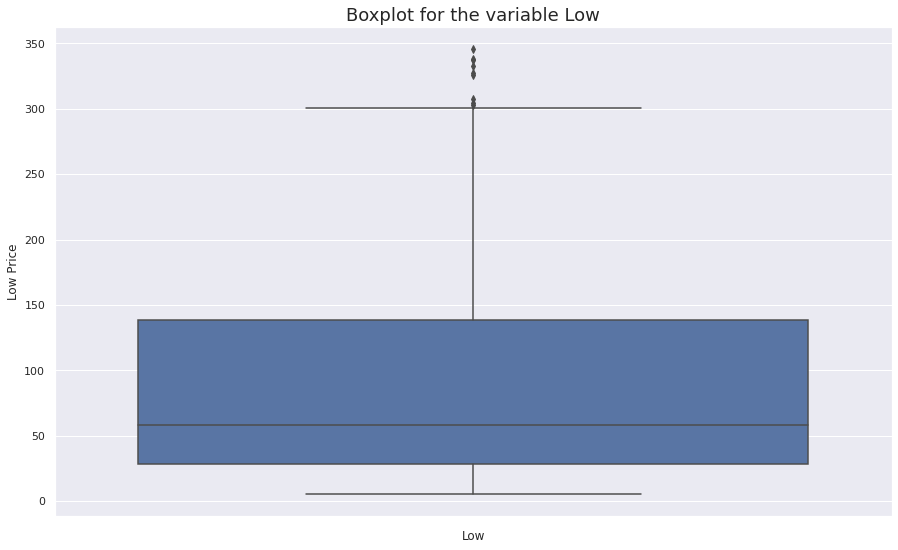

In [75]:
# plot boxplots for each indepedent variable
for feature in ['Open','High','Low']:
  sns.boxplot(y = yes_df[feature])
  plt.title(f"Boxplot for the variable {feature}", fontsize = 18)
  plt.xlabel(f"{feature}")
  plt.ylabel(f"{feature} Price")
  plt.show()

* As we have already seen before that the outliers shown by the boxplots are not outliers in real life.

* As per the information we get from stock trading platforms, these range of prices has occurred in real life and hence we cannot treat any of these values as outliers for our modelling.

### **Let us check the correlation now:**

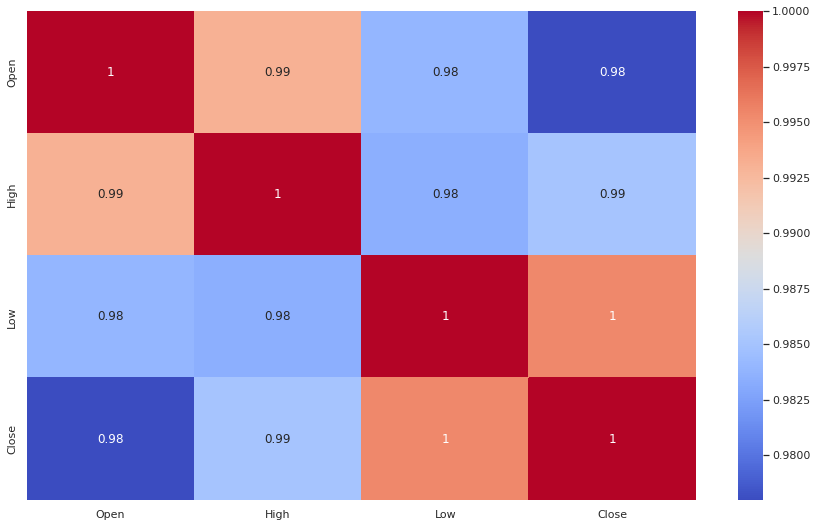

In [76]:
# check correlation with a heatmap
sns.heatmap(yes_df.corr(), annot=True, cmap='coolwarm')
plt.show()

* No variable or variables has high correlation as compared with the other variables.

* The scale of correlation between all the variables is already high and we cannot mark any individual pair as being more correlated as compared to other variables.

### **Now, let us check the relation of independent variables with the dependent variable:**

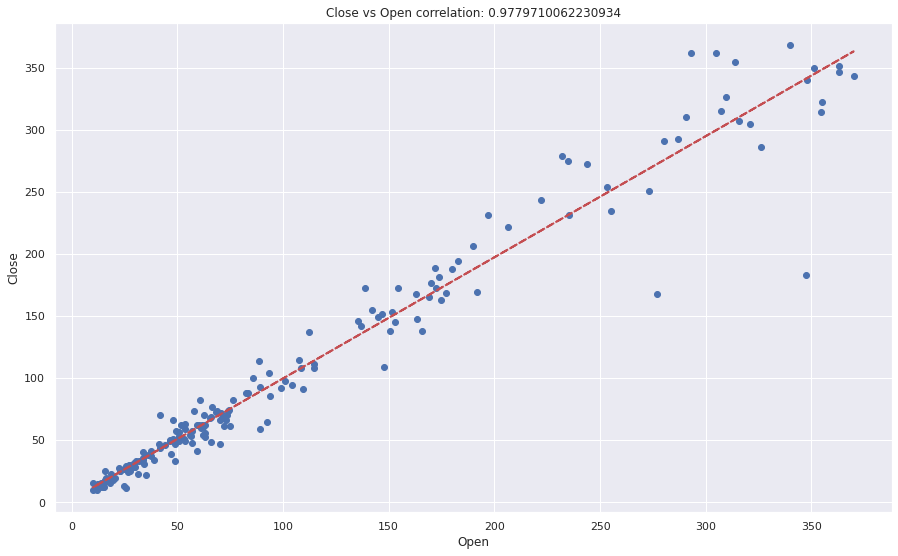

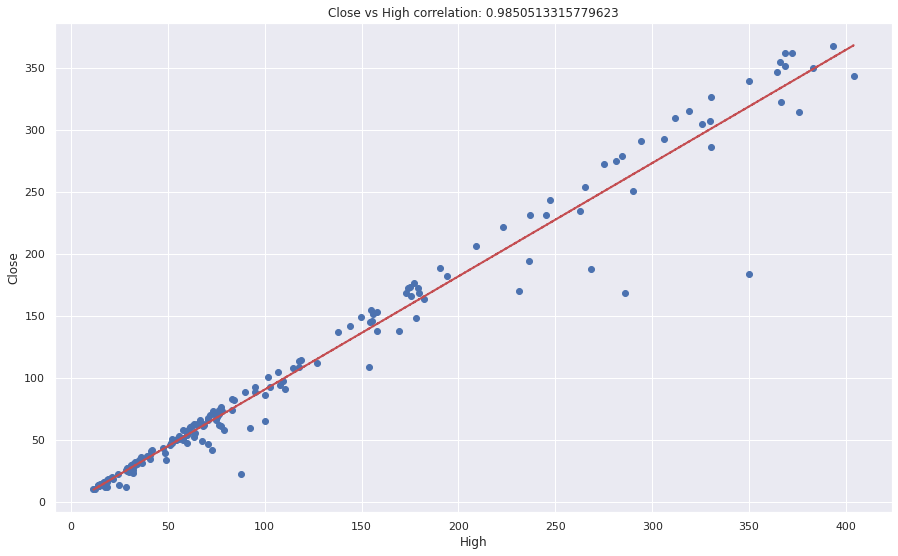

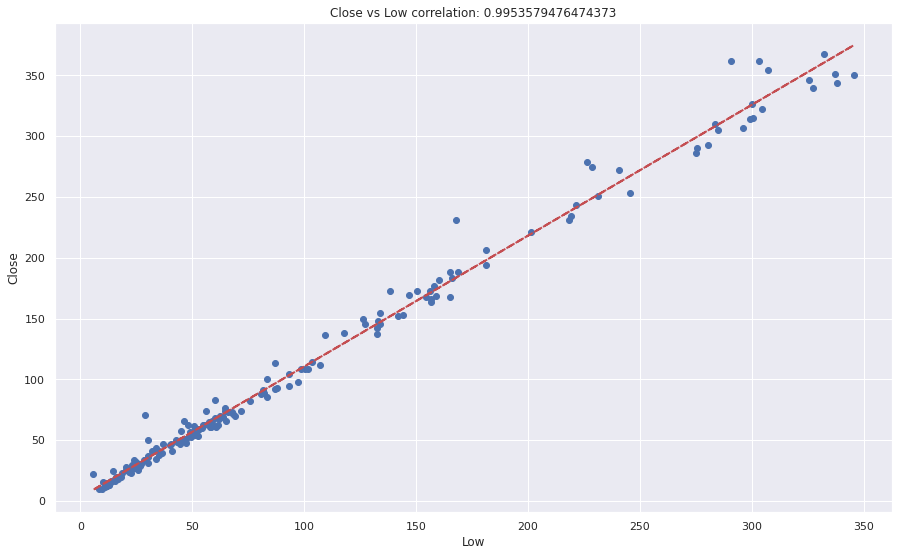

In [77]:
# relation of independent variables with the dependent variable
for feature in ['Open','High','Low']:
  plt.figure()
  var = yes_df[feature]
  label = yes_df['Close']
  correlation = var.corr(label)
  plt.scatter(x = var, y = label)
  plt.xlabel(feature)
  plt.ylabel('Close')
  plt.title(f"Close vs {feature} correlation: {correlation}")
  z = np.polyfit(var, label, 1)
  y_hat = np.poly1d(z)(yes_df[feature])
  plt.plot(yes_df[feature], y_hat, "r--", lw=2)

plt.show()

* We can see from the plots above that all the independent variables are related linearly with the dependent variable with a high amount of correlation.

* Thus, our prediction will be more or less efficient and accurate.

## **Data Preparation:**

In [29]:
# create the set of dependent and independent variables
dependent_variable = 'Close'
independent_variables = ['Open', 'High', 'Low']
print(dependent_variable)
print(independent_variables)

X = yes_df[independent_variables]
Y = yes_df[dependent_variable]

# split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)

Close
['Open', 'High', 'Low']
(129, 3)
(56, 3)


## **Building a Linear Regression Model:**

In [30]:
# transforming the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# linear regression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

print(regressor.score(X_train, Y_train))
print("The coefficients are: ", regressor.coef_)
print("The intercept is :", regressor.intercept_)

# predictions after modeling
linreg_train_pred = regressor.predict(X_train)
linreg_test_pred = regressor.predict(X_test)

0.9952288628537579
The coefficients are:  [-150.64116876  173.83063092  342.40720687]
The intercept is : 7.92380971893634


### **Evaluation Metrics:**

In [31]:
# func to evaluate metrics
def print_metrics(actual, predicted):
  MSE = mean_squared_error(actual, predicted)
  RMSE = math.sqrt(mean_squared_error(actual, predicted))
  R2 = r2_score(actual, predicted)
  Adj_R2 = 1 - (((len(actual) - 1)/(len(actual) - len(independent_variables) - 1)) * (1 - r2_score(actual, predicted)))

  print('MSE is {}'.format(MSE))
  print('RMSE is {}'.format(RMSE))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('R2 score is {}'.format(R2))
  print('Adjusted R2 score is {}'.format(Adj_R2))

  return MSE, RMSE, R2, Adj_R2

## **Evaluating the Model:**

In [32]:
# training dataset metrics
print("Train Set Metrics: \n")
print_metrics(Y_train, linreg_train_pred)
print('\n')
# testing dataset metrics
print("Test Set Metrics: \n")
lin_reg_metrics = print_metrics(Y_test, linreg_test_pred)
print('---------------------------')

Train Set Metrics: 

MSE is 42.75285774773585
RMSE is 6.538566949090286
MAE is 4.009539702287173
R2 score is 0.9952288628537579
Adjusted R2 score is 0.995114355562248


Test Set Metrics: 

MSE is 62.378015533103294
RMSE is 7.897975407223252
MAE is 4.96795466065376
R2 score is 0.9944176561688847
Adjusted R2 score is 0.9940955978709357
---------------------------


In [33]:
# store the metrics of linear regression
lin_reg_mse = lin_reg_metrics[0]
lin_reg_rmse = lin_reg_metrics[1]
lin_reg_r2 = lin_reg_metrics[2]
lin_reg_adj_r2 = lin_reg_metrics[3]

### **Observing the predictions in a dataframe:**

In [34]:
# actual vs predicted values
prediction = pd.DataFrame(
    {'Actual Data': Y_test,
     'Predicted Data': linreg_test_pred}
)
prediction

,Actual Data,Predicted Data
33,34.06,32.285563
125,145.23,141.318109
173,46.95,44.908434
112,142.08,142.020144
61,62.22,67.160645
18,30.16,32.805758
137,231.26,232.402594
7,16.12,18.383120
5,13.71,15.673656
162,194.30,213.616763


### **Visualizing the difference between the actual values and the predicted values:**

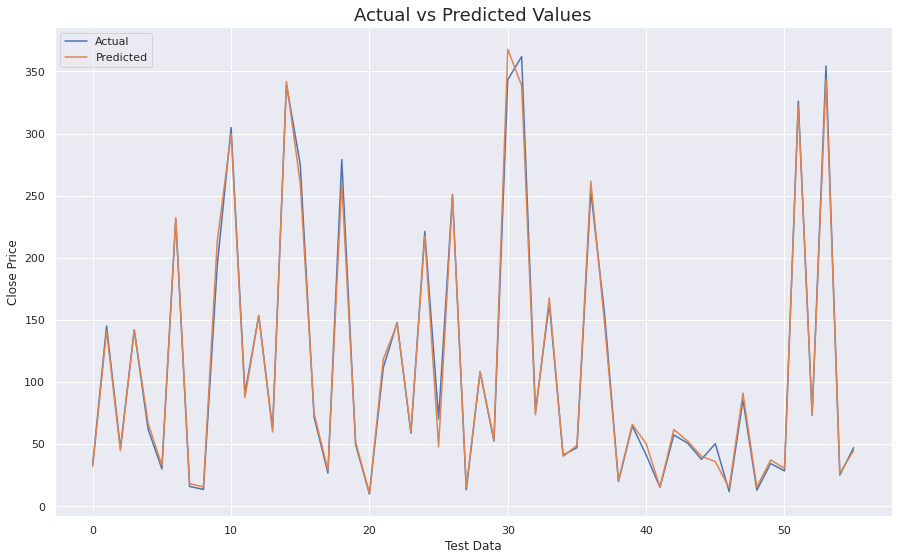

In [78]:
# actual vs predicted values
def visualize_difference(actual, predicted):
  plt.plot(np.array(actual), label='Actual')
  plt.plot(predicted, label='Predicted')
  plt.title("Actual vs Predicted Values", fontsize = 18)
  plt.xlabel("Test Data")
  plt.ylabel("Close Price")
  plt.legend()
  plt.show()

# visualize actual vs predicted for linear regression
visualize_difference(Y_test, linreg_test_pred)

### **Linear Regression Assumptions:**

  * Relation between the dependent and independent variable should be linear.
  * Mean of residuals should be close to zero as much as possible.
  * There should be homoscedasticity or equal variance present.
  * There should not be any multicollinearity between independent variables.

### **Validating the Assumptions:**

 * We have already seen that our independent variables are related linearly to the dependent variable. So this assumption stands valid.

In [36]:
# mean of residuals
# residual = actual_value - predicted_value
residuals_train = Y_train - linreg_train_pred
residuals_test = Y_test - linreg_test_pred

round((np.mean(residuals_train)))

0

* Mean of residuals for our case is zero which proves that our second assumption is also valid.

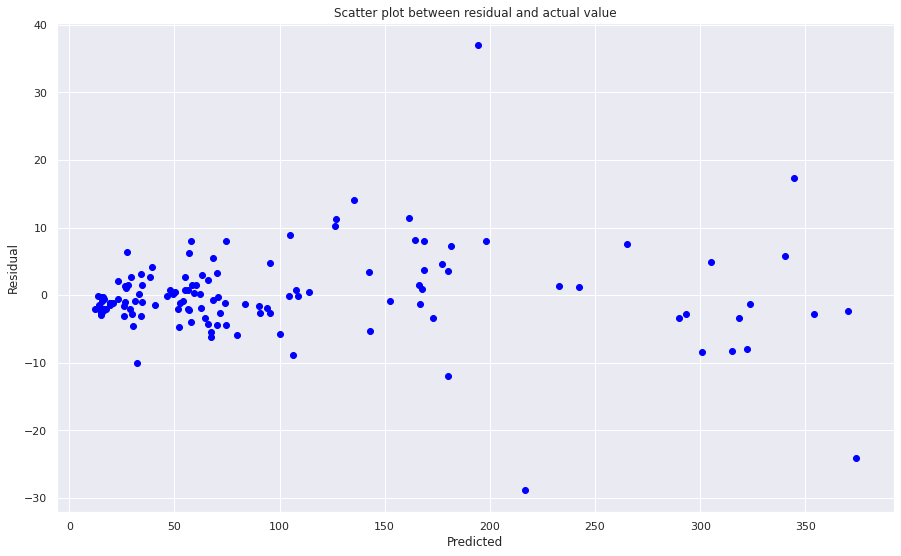

In [79]:
# check for homoscedasticity
# Plotting scatter plot between residual and fitted values
plt.scatter(linreg_train_pred, residuals_train,c='blue')
plt.title('Scatter plot between residual and actual value')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()

* There is no significant pattern available for heteroscedasiticity and hence we can state that our third assumption of homosecdasticity is valid.

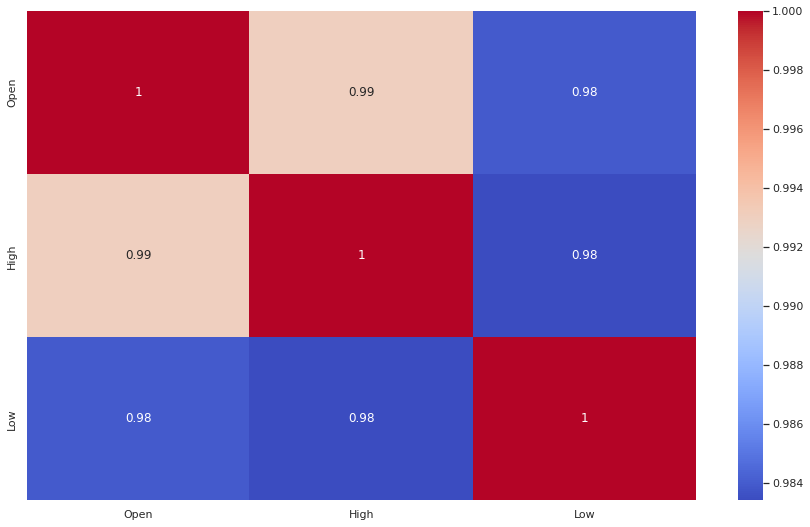

In [80]:
# check for multicollinearity
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()

* Our data doesn't contain any independent variable pair for which the collinearity is high as compared to other independent variables and thus we cannot remove any variable from our model.

## **Building a Lasso Regression Model:**

In [39]:
# fitting lasso with cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_cv = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train, Y_train)

# print out the best parameter and the score
print("The best fit alpha value is found out to be :", lasso_cv.best_params_)
print("Using", lasso_cv.best_params_, "the negative mean squared error is :", lasso_cv.best_score_)

# predictions after modeling
lasso_train_pred = lasso_cv.predict(X_train)
lasso_test_pred = lasso_cv.predict(X_test)

The best fit alpha value is found out to be : {'alpha': 1e-15}
Using {'alpha': 1e-15} the negative mean squared error is : -63.027268918876096


### **Evaluating the Model:**

In [40]:
# training dataset metrics
print("Train Set Metrics: \n")
print_metrics(Y_train, lasso_train_pred)
print('\n')
# testing dataset metrics
print("Test Set Metrics: \n")
lasso_reg_metrics = print_metrics(Y_test, lasso_test_pred)
print('---------------------------')

Train Set Metrics: 

MSE is 42.75285774773646
RMSE is 6.538566949090333
MAE is 4.009539724011824
R2 score is 0.9952288628537578
Adjusted R2 score is 0.9951143555622479


Test Set Metrics: 

MSE is 62.37802008254432
RMSE is 7.897975695236363
MAE is 4.967954764784649
R2 score is 0.9944176557617453
Adjusted R2 score is 0.9940955974403076
---------------------------


In [41]:
# store the metrics of lasso regression
lasso_reg_mse = lasso_reg_metrics[0]
lasso_reg_rmse = lasso_reg_metrics[1]
lasso_reg_r2 = lasso_reg_metrics[2]
lasso_reg_adj_r2 = lasso_reg_metrics[3]

### **Visualizing the difference between the actual values and the predicted values:**

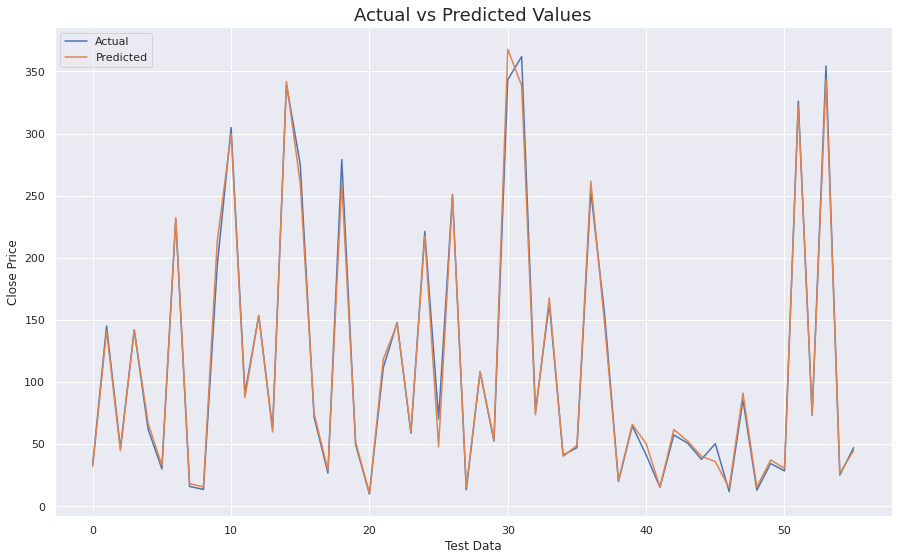

In [81]:
# actual vs predicted values for lasso regression
visualize_difference(Y_test, lasso_test_pred)

## **Building a Ridge Regression Model:**

In [43]:
# fitting ridge with cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
ridge_cv = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train, Y_train)

# print out the best parameter and the score
print("The best fit alpha value is found out to be :", ridge_cv.best_params_)
print("Using", ridge_cv.best_params_, "the negative mean squared error is :", ridge_cv.best_score_)

# predictions after modeling
ridge_train_pred = ridge_cv.predict(X_train)
ridge_test_pred = ridge_cv.predict(X_test)

The best fit alpha value is found out to be : {'alpha': 0.01}
Using {'alpha': 0.01} the negative mean squared error is : -61.49651840781473


### **Evaluating the Model:**

In [44]:
# training dataset metrics
print("Train Set Metrics: \n")
print_metrics(Y_train, ridge_train_pred)
print('\n')
# testing dataset metrics
print("Test Set Metrics: \n")
ridge_reg_metrics = print_metrics(Y_test, ridge_test_pred)
print('---------------------------')

Train Set Metrics: 

MSE is 43.46361710377421
RMSE is 6.5926942219227955
MAE is 4.073527069588264
R2 score is 0.9951495434691768
Adjusted R2 score is 0.9950331325124371


Test Set Metrics: 

MSE is 67.59194181855695
RMSE is 8.221431859387813
MAE is 5.090262509787354
R2 score is 0.9939510506030176
Adjusted R2 score is 0.9936020727531917
---------------------------


In [45]:
# store the metrics of ridge regression
ridge_reg_mse = ridge_reg_metrics[0]
ridge_reg_rmse = ridge_reg_metrics[1]
ridge_reg_r2 = ridge_reg_metrics[2]
ridge_reg_adj_r2 = ridge_reg_metrics[3]

### **Visualizing the difference between the actual values and the predicted values:**

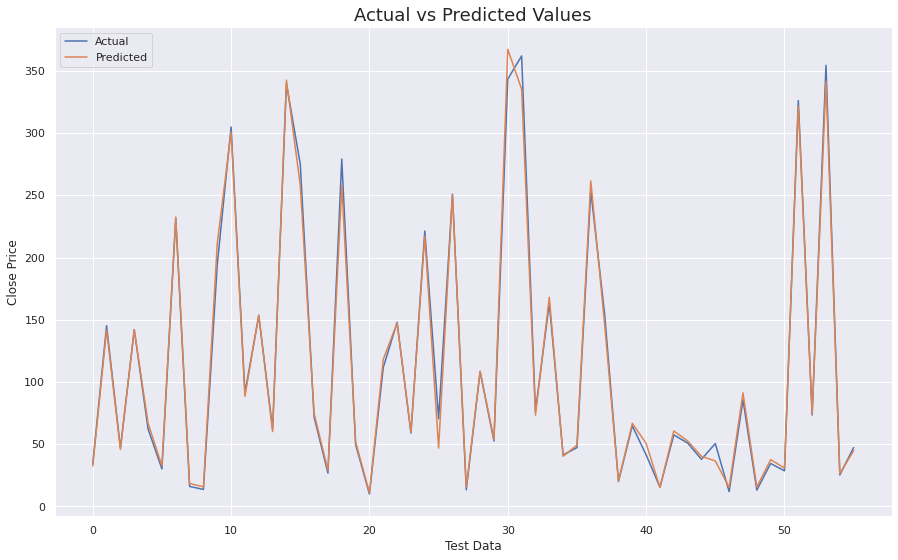

In [82]:
# actual vs predicted values for ridge regression
visualize_difference(Y_test, ridge_test_pred)

## **Building an Elastic Net Regression Model:**

In [57]:
# fitting elastic net with cross validation
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100], 'l1_ratio': [0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_cv = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error', cv=5)
elastic_cv.fit(X_train, Y_train)

# print out the best parameter and the score
print("The best fit alpha value is found out to be :", elastic_cv.best_params_)
print("Using", elastic_cv.best_params_, "the negative mean squared error is :", elastic_cv.best_score_)

# predictions after modeling
elastic_train_pred = elastic_cv.predict(X_train)
elastic_test_pred = elastic_cv.predict(X_test)

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.3}
Using {'alpha': 0.0001, 'l1_ratio': 0.3} the negative mean squared error is : -61.44467626947959


### **Evaluating the Model:**

In [58]:
# training dataset metrics
print("Train Set Metrics: \n")
print_metrics(Y_train, elastic_train_pred)
print('\n')
# testing dataset metrics
print("Test Set Metrics: \n")
elastic_reg_metrics = print_metrics(Y_test, elastic_test_pred)
print('---------------------------')

Train Set Metrics: 

MSE is 43.34713897861711
RMSE is 6.583854416572188
MAE is 4.0613273606438876
R2 score is 0.995162542205143
Adjusted R2 score is 0.9950464432180665


Test Set Metrics: 

MSE is 67.11090392889732
RMSE is 8.192124506432828
MAE is 5.080325394563828
R2 score is 0.9939940997265416
Adjusted R2 score is 0.993647605479996
---------------------------


In [59]:
# store the metrics of elastic net regression
elastic_reg_mse = elastic_reg_metrics[0]
elastic_reg_rmse = elastic_reg_metrics[1]
elastic_reg_r2 = elastic_reg_metrics[2]
elastic_reg_adj_r2 = elastic_reg_metrics[3]

### **Visualizing the difference between the actual values and the predicted values:**

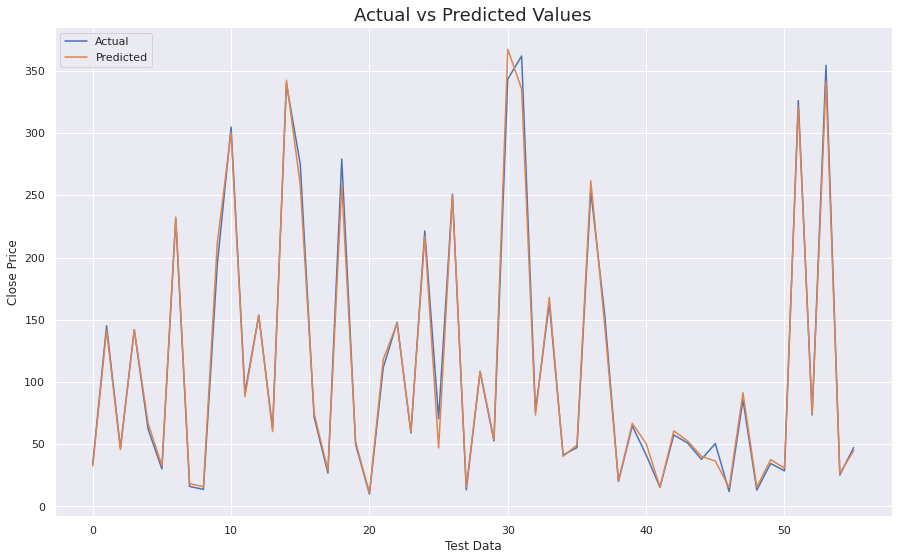

In [83]:
# actual vs predicted values for elastic net regression
visualize_difference(Y_test, elastic_test_pred)

## **Building a Random Forest Regressor Model:**

In [47]:
# define a random forest model
# hyperparameter grid
param_dict = {'n_estimators': [int(x) for x in np.linspace(100,2000,20)],
              'max_depth': [int(x) for x in np.linspace(5,15,10)],
              'max_leaf_nodes': [int(x) for x in np.linspace(5,20,10)],
              'min_samples_split': [int(x) for x in np.linspace(1,10,10)],
              'min_samples_leaf': [int(x) for x in np.linspace(1,20,10)]}

# build a random forest model
rf_model = RandomForestRegressor()

# random search
rf_grid = RandomizedSearchCV(estimator = rf_model,
                       param_distributions = param_dict,
                       cv = 5, verbose = 2, scoring='neg_mean_squared_error')

rf_grid.fit(X_train, Y_train)
print(rf_grid.best_estimator_)
rf_optimal_model = rf_grid.best_estimator_
print(rf_grid.best_params_)

# predicitions after modeling
rf_train_pred = rf_optimal_model.predict(X_train)
rf_test_pred = rf_optimal_model.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=15, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=15, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=15, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=15, min_samples_split=8, n_estimators=200; total time=   0.3s
[CV] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=15, min_samples_split=8, n_estimators=200; total time=   0.2s
[CV] END max_depth=12, max_leaf_nodes=8, min_samples_leaf=17, min_samples_split=4, n_estimators=800; total time=   0.9s
[CV] END max_depth=12, max_leaf_nodes=8, min_samples_leaf=17, min_samples_split=4, n_estimators=800; total time=   0.9s
[CV] END max_depth=12, max_leaf_nodes=8, min_samples_leaf=17, min_samples_split=4, n_estimator

### **Evaluating the Model:**

In [48]:
# training dataset metrics
print("Train Set Metrics: \n")
print_metrics(Y_train, rf_train_pred)
print('\n')
# testing dataset metrics
print("Test Set Metrics: \n")
rf_reg_metrics = print_metrics(Y_test, rf_test_pred)
print('---------------------------')

Train Set Metrics: 

MSE is 26.473251291143512
RMSE is 5.145216350275614
MAE is 3.752578156628822
R2 score is 0.997045635794401
Adjusted R2 score is 0.9969747310534666


Test Set Metrics: 

MSE is 147.72654880236246
RMSE is 12.154281089491162
MAE is 7.813313324003869
R2 score is 0.9867796309108104
Adjusted R2 score is 0.986016917309511
---------------------------


In [49]:
# store the metrics of random forest regression
rf_reg_mse = rf_reg_metrics[0]
rf_reg_rmse = rf_reg_metrics[1]
rf_reg_r2 = rf_reg_metrics[2]
rf_reg_adj_r2 = rf_reg_metrics[3]

### **Visualizing the difference between the actual values and the predicted values:**

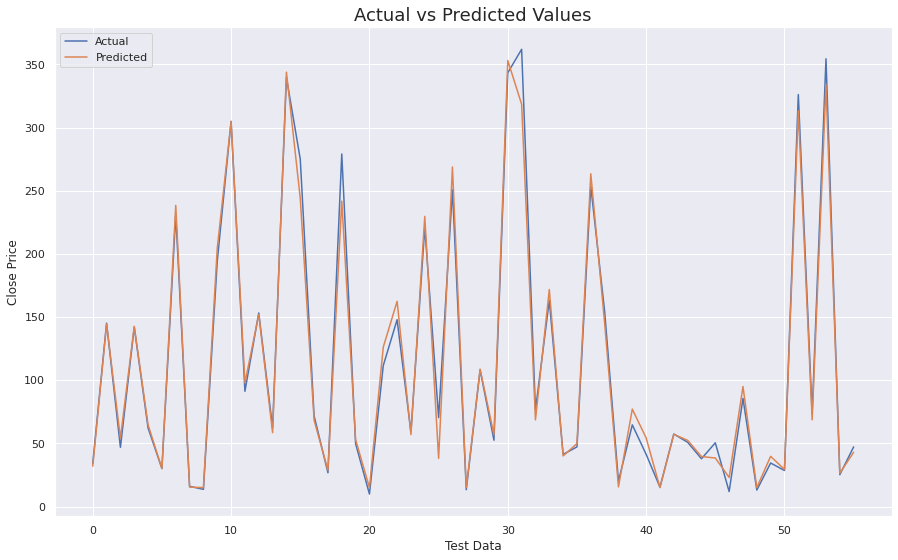

In [84]:
# actual vs predicted values for random forest regression
visualize_difference(Y_test, rf_test_pred)

## **Building a Gradient Boosting Regressor:**

In [51]:
# build a gradient boosting model
# hyperparameter grid
param_dict = {'n_estimators': [int(x) for x in np.linspace(10,1000,100)],
              'max_depth': [int(x) for x in np.linspace(5,25,10)],
              'max_leaf_nodes': [int(x) for x in np.linspace(5,20,5)],
              'learning_rate': [0.001,0.05,0.02,0.01,0.1]
              }

# build a gradient boosting model
gb_model = GradientBoostingRegressor()

# random search
gb_grid = RandomizedSearchCV(estimator = gb_model,
                       param_distributions = param_dict,
                       cv = 5, verbose = 2, scoring = 'neg_mean_squared_error')

gb_grid.fit(X_train,Y_train)
print(gb_grid.best_estimator_)
gb_optimal_model = gb_grid.best_estimator_
print(gb_grid.best_params_)

# predictions after modeling
gb_train_pred = gb_optimal_model.predict(X_train)
gb_test_pred = gb_optimal_model.predict(X_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.02, max_depth=13, max_leaf_nodes=5, n_estimators=590; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=13, max_leaf_nodes=5, n_estimators=590; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=13, max_leaf_nodes=5, n_estimators=590; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=13, max_leaf_nodes=5, n_estimators=590; total time=   0.2s
[CV] END learning_rate=0.02, max_depth=13, max_leaf_nodes=5, n_estimators=590; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=11, max_leaf_nodes=16, n_estimators=390; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=11, max_leaf_nodes=16, n_estimators=390; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=11, max_leaf_nodes=16, n_estimators=390; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=11, max_leaf_nodes=16, n_estimators=390; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=11, max_leaf_n

### **Evaluating the Model:**

In [52]:
# training dataset metrics
print("Train Set Metrics: \n")
print_metrics(Y_train, gb_train_pred)
print('\n')
# testing dataset metrics
print("Test Set Metrics: \n")
gb_reg_metrics = print_metrics(Y_test, gb_test_pred)
print('---------------------------')

Train Set Metrics: 

MSE is 3.1046521542788263
RMSE is 1.7620023139255028
MAE is 1.2960290829205596
R2 score is 0.9996535267582147
Adjusted R2 score is 0.9996452114004118


Test Set Metrics: 

MSE is 147.6047487008142
RMSE is 12.149269471898885
MAE is 7.706290914325781
R2 score is 0.9867905310659323
Adjusted R2 score is 0.9860284463197361
---------------------------


In [53]:
# store the metrics of gradient boosting regression
gb_reg_mse = gb_reg_metrics[0]
gb_reg_rmse = gb_reg_metrics[1]
gb_reg_r2 = gb_reg_metrics[2]
gb_reg_adj_r2 = gb_reg_metrics[3]

### **Visualizing the difference between the actual values and the predicted values:**

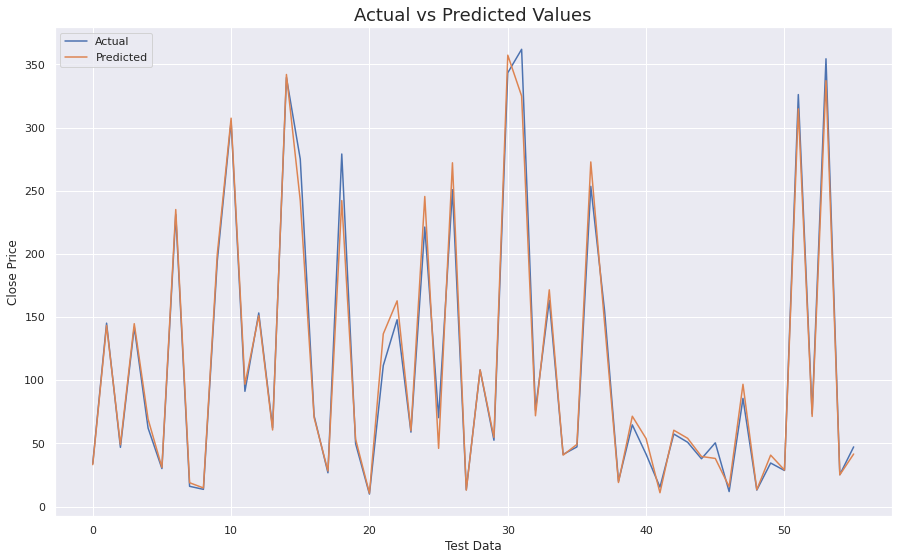

In [85]:
# actual vs predicted values for gradient boosting regression
visualize_difference(Y_test, gb_test_pred)

## **Now, let us compare all our models:**

In [61]:
models_df = pd.DataFrame(
    {'Models': ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Elastic Net Regression', 'Random Forest Regression', 'Gradient Boosting Regression'],
     'MSE': [lin_reg_mse, lasso_reg_mse, ridge_reg_mse, elastic_reg_mse, rf_reg_mse, gb_reg_mse],
     'RMSE': [lin_reg_rmse, lasso_reg_rmse, ridge_reg_rmse, elastic_reg_rmse, rf_reg_rmse, gb_reg_rmse],
     'R-Squared': [lin_reg_r2, lasso_reg_r2, ridge_reg_r2, elastic_reg_r2, rf_reg_r2, gb_reg_r2],
     'Adjusted R-Squared': [lin_reg_adj_r2, lasso_reg_adj_r2, ridge_reg_adj_r2, elastic_reg_adj_r2, rf_reg_adj_r2, gb_reg_adj_r2]}
)
models_df.sort_values(by=['MSE'], ascending=True, inplace=True)
models_df

,Models,MSE,RMSE,R-Squared,Adjusted R-Squared
0,Linear Regression,62.378016,7.897975,0.994418,0.994096
1,Lasso Regression,62.378020,7.897976,0.994418,0.994096
3,Elastic Net Regression,67.110904,8.192125,0.993994,0.993648
2,Ridge Regression,67.591942,8.221432,0.993951,0.993602
5,Gradient Boosting Regression,147.604749,12.149269,0.986791,0.986028
4,Random Forest Regression,147.726549,12.154281,0.986780,0.986017


### **Visualizing the R-Squared Measure for all our models:**

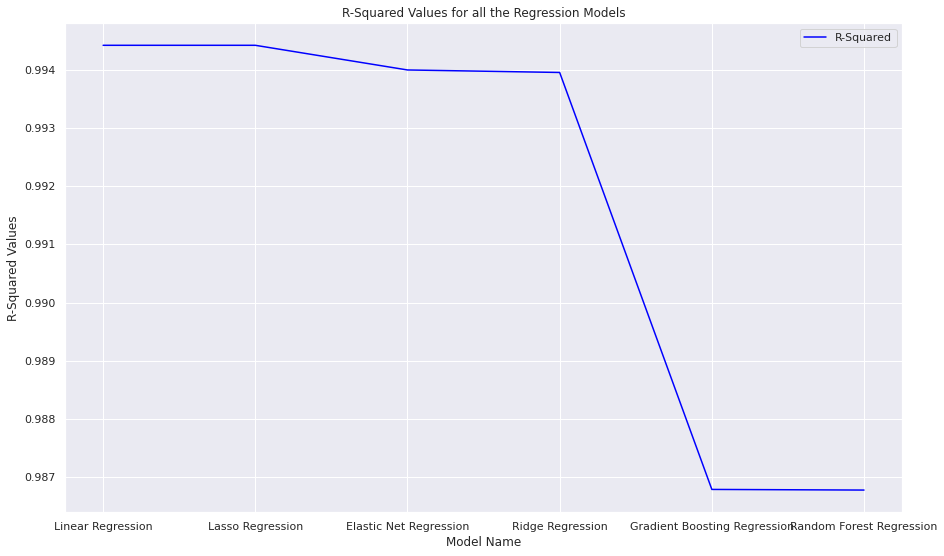

In [86]:
plt.figure()
ax = plt.gca()
models_df.plot(kind='line', x='Models', y='R-Squared', color='blue', ax=ax)
plt.title('R-Squared Values for all the Regression Models')
plt.xlabel('Model Name')
plt.ylabel('R-Squared Values')
plt.show()